# **df4 - Preprocessing**

# **Multilingual Insurance Policy Dataset**

In [1]:
!pip install faker

In [2]:
import pandas as pd
from faker import Faker
import random

fake = Faker()
Faker.seed(42)

# Sample policy texts in different languages
english_policies = [
    "This policy covers damage to your vehicle caused by accidents.",
    "The health policy ensures coverage for medical expenses.",
    "Home insurance protects against damage from natural disasters.",
    "Vehicle insurance covers theft and vandalism.",
    "Comprehensive insurance includes fire damage coverage.",
    "Medical insurance covers hospitalization costs.",
    "Life insurance provides financial security for beneficiaries.",
    "Travel insurance covers trip cancellations and emergencies.",
    "Business insurance protects against liability claims.",
    "Pet insurance covers veterinary expenses."
]

french_policies = [
    "Cette police couvre les dommages causés à votre véhicule par des accidents.",
    "La police de santé garantit la couverture des frais médicaux.",
    "L'assurance habitation protège contre les dommages causés par les catastrophes naturelles.",
    "L'assurance automobile couvre le vol et le vandalisme.",
    "L'assurance multirisque comprend la couverture des incendies.",
    "L'assurance médicale couvre les frais d'hospitalisation.",
    "L'assurance vie offre une sécurité financière aux bénéficiaires.",
    "L'assurance voyage couvre les annulations de voyage et les urgences.",
    "L'assurance entreprise protège contre les réclamations en responsabilité civile.",
    "L'assurance pour animaux couvre les frais vétérinaires."
]

spanish_policies = [
    "Esta póliza cubre los daños a su vehículo causados por accidentes.",
    "La póliza de salud asegura la cobertura de gastos médicos.",
    "El seguro de hogar protege contra daños causados por desastres naturales.",
    "El seguro de automóvil cubre el robo y el vandalismo.",
    "El seguro integral incluye cobertura contra incendios.",
    "El seguro médico cubre los gastos de hospitalización.",
    "El seguro de vida proporciona seguridad financiera a los beneficiarios.",
    "El seguro de viaje cubre cancelaciones de viaje y emergencias.",
    "El seguro empresarial protege contra reclamaciones de responsabilidad civil.",
    "El seguro para mascotas cubre gastos veterinarios."
]

# AI-generated summaries
summaries = [
    "Covers vehicle accident damage.",
    "Provides medical expense coverage.",
    "Protects home from natural disasters.",
    "Covers vehicle theft and vandalism.",
    "Includes fire damage protection.",
    "Covers hospitalization costs.",
    "Ensures financial security for life insurance beneficiaries.",
    "Covers trip cancellations and emergencies.",
    "Protects businesses from liability claims.",
    "Covers veterinary expenses for pets."
]

# Create synthetic data
num_records = 1000

data = {
    'Policy_ID': [fake.uuid4() for _ in range(num_records)],
    'Policy_Text_EN': [random.choice(english_policies) for _ in range(num_records)],
    'Policy_Text_FR': [random.choice(french_policies) for _ in range(num_records)],
    'Policy_Text_ES': [random.choice(spanish_policies) for _ in range(num_records)],
    'Summarized_Text': [random.choice(summaries) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv', index=False)

print("Synthetic policy dataset created successfully!")


Synthetic policy dataset created successfully!


# **1) Missing Values**

In [3]:
import pandas as pd
df4=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv')
df4.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Vehicle insurance covers theft and vandalism.,L'assurance habitation protège contre les domm...,Esta póliza cubre los daños a su vehículo caus...,Covers hospitalization costs.
1,23b8c1e9-3924-46de-beb1-3b9046685257,Vehicle insurance covers theft and vandalism.,L'assurance entreprise protège contre les récl...,El seguro de hogar protege contra daños causad...,Includes fire damage protection.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Pet insurance covers veterinary expenses.,L'assurance vie offre une sécurité financière ...,El seguro de automóvil cubre el robo y el vand...,Includes fire damage protection.
3,972a8469-1641-4f82-8b9d-2434e465e150,Business insurance protects against liability ...,L'assurance habitation protège contre les domm...,El seguro para mascotas cubre gastos veterinar...,Covers veterinary expenses for pets.
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Business insurance protects against liability ...,L'assurance vie offre une sécurité financière ...,El seguro médico cubre los gastos de hospitali...,Protects home from natural disasters.


In [4]:
df4.isnull().sum()

,0
Policy_ID,0
Policy_Text_EN,0
Policy_Text_FR,0
Policy_Text_ES,0
Summarized_Text,0


In [5]:
df4.nunique()

,0
Policy_ID,1000
Policy_Text_EN,10
Policy_Text_FR,10
Policy_Text_ES,10
Summarized_Text,10


# **1 ) Text Normalization**

**1) Convert text to lowercase,**

**2) remove special characters,**

**3) expand contractions.** - Change the Size of the Word

# **i) Convert text to lowercase**

# **Policy_Text &	Summarized_Text**


In [6]:
df4['Policy_Text_EN'] = df4['Policy_Text_EN'].str.lower()
df4['Policy_Text_FR'] = df4['Policy_Text_FR'].str.lower()
df4['Policy_Text_ES'] = df4['Policy_Text_ES'].str.lower()
df4['Summarized_Text'] = df4['Summarized_Text'].str.lower()

In [7]:
df4.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,vehicle insurance covers theft and vandalism.,l'assurance habitation protège contre les domm...,esta póliza cubre los daños a su vehículo caus...,covers hospitalization costs.
1,23b8c1e9-3924-46de-beb1-3b9046685257,vehicle insurance covers theft and vandalism.,l'assurance entreprise protège contre les récl...,el seguro de hogar protege contra daños causad...,includes fire damage protection.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,pet insurance covers veterinary expenses.,l'assurance vie offre une sécurité financière ...,el seguro de automóvil cubre el robo y el vand...,includes fire damage protection.
3,972a8469-1641-4f82-8b9d-2434e465e150,business insurance protects against liability ...,l'assurance habitation protège contre les domm...,el seguro para mascotas cubre gastos veterinar...,covers veterinary expenses for pets.
4,17fc695a-07a0-4a6e-8822-e8f36c031199,business insurance protects against liability ...,l'assurance vie offre une sécurité financière ...,el seguro médico cubre los gastos de hospitali...,protects home from natural disasters.


# **ii) remove special characters**

In [8]:
import re
df4['Policy_Text_EN'] = df4['Policy_Text_EN'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df4['Policy_Text_FR'] = df4['Policy_Text_FR'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df4['Policy_Text_ES'] = df4['Policy_Text_ES'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df4['Summarized_Text'] = df4['Summarized_Text'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df4.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,vehicle insurance covers theft and vandalism,lassurance habitation protge contre les dommag...,esta pliza cubre los daos a su vehculo causado...,covers hospitalization costs
1,23b8c1e9-3924-46de-beb1-3b9046685257,vehicle insurance covers theft and vandalism,lassurance entreprise protge contre les rclama...,el seguro de hogar protege contra daos causado...,includes fire damage protection
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,pet insurance covers veterinary expenses,lassurance vie offre une scurit financire aux ...,el seguro de automvil cubre el robo y el vanda...,includes fire damage protection
3,972a8469-1641-4f82-8b9d-2434e465e150,business insurance protects against liability ...,lassurance habitation protge contre les dommag...,el seguro para mascotas cubre gastos veterinarios,covers veterinary expenses for pets
4,17fc695a-07a0-4a6e-8822-e8f36c031199,business insurance protects against liability ...,lassurance vie offre une scurit financire aux ...,el seguro mdico cubre los gastos de hospitaliz...,protects home from natural disasters


# **iii ) expand contractions.**

In [9]:
!pip install contractions

In [10]:
import re
import contractions

df4['Policy_Text_EN'] = df4['Policy_Text_EN'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', contractions.fix(x)))
df4['Policy_Text_FR'] = df4['Policy_Text_FR'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', contractions.fix(x)))
df4['Policy_Text_ES'] = df4['Policy_Text_ES'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', contractions.fix(x)))
df4['Summarized_Text'] = df4['Summarized_Text'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', contractions.fix(x)))
df4.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,vehicle insurance covers theft and vandalism,lassurance habitation protge contre les dommag...,esta pliza cubre los daos a su vehculo causado...,covers hospitalization costs
1,23b8c1e9-3924-46de-beb1-3b9046685257,vehicle insurance covers theft and vandalism,lassurance entreprise protge contre les rclama...,el seguro de hogar protege contra daos causado...,includes fire damage protection
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,pet insurance covers veterinary expenses,lassurance vie offre une scurit financire aux ...,el seguro de automvil cubre el robo y el vanda...,includes fire damage protection
3,972a8469-1641-4f82-8b9d-2434e465e150,business insurance protects against liability ...,lassurance habitation protge contre les dommag...,el seguro para mascotas cubre gastos veterinarios,covers veterinary expenses for pets
4,17fc695a-07a0-4a6e-8822-e8f36c031199,business insurance protects against liability ...,lassurance vie offre une scurit financire aux ...,el seguro mdico cubre los gastos de hospitaliz...,protects home from natural disasters


# **expand contractions example:**

    import contractions

    text = "I'm going to the store."

    expanded_text = contractions.fix(text)  

    print(expanded_text)  # Output: "I am going to the store."


# **2) Tokenization & Embeddings**

# **i) Tokenization**

a) Sentence Tokenization

b) Word Tokenization

c) Letter Tokenization

In [11]:
# Step 1: Uninstall NLTK and delete its data entirely
!pip uninstall -y nltk
!rm -rf /root/nltk_data
!rm -rf /usr/local/nltk_data

# Step 2: Reinstall a stable version of NLTK
!pip install nltk==3.8.1  # Pin to a stable version

Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Successfully uninstalled nltk-3.8.1
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
df4=pd.read_csv('/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv')

In [14]:
# Tokenizing text
df4['Policy_Text_Tokens_EN'] = df4['Policy_Text_EN'].apply(word_tokenize)
df4['Policy_Text_Tokens_FR'] = df4['Policy_Text_FR'].apply(word_tokenize)
df4['Policy_Text_Tokens_ES'] = df4['Policy_Text_ES'].apply(word_tokenize)
df4['Summarized_Text_Tokens'] = df4['Summarized_Text'].apply(word_tokenize)
df4.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text,Policy_Text_Tokens_EN,Policy_Text_Tokens_FR,Policy_Text_Tokens_ES,Summarized_Text_Tokens
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Vehicle insurance covers theft and vandalism.,L'assurance habitation protège contre les domm...,Esta póliza cubre los daños a su vehículo caus...,Covers hospitalization costs.,"[Vehicle, insurance, covers, theft, and, vanda...","[L'assurance, habitation, protège, contre, les...","[Esta, póliza, cubre, los, daños, a, su, vehíc...","[Covers, hospitalization, costs, .]"
1,23b8c1e9-3924-46de-beb1-3b9046685257,Vehicle insurance covers theft and vandalism.,L'assurance entreprise protège contre les récl...,El seguro de hogar protege contra daños causad...,Includes fire damage protection.,"[Vehicle, insurance, covers, theft, and, vanda...","[L'assurance, entreprise, protège, contre, les...","[El, seguro, de, hogar, protege, contra, daños...","[Includes, fire, damage, protection, .]"
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Pet insurance covers veterinary expenses.,L'assurance vie offre une sécurité financière ...,El seguro de automóvil cubre el robo y el vand...,Includes fire damage protection.,"[Pet, insurance, covers, veterinary, expenses, .]","[L'assurance, vie, offre, une, sécurité, finan...","[El, seguro, de, automóvil, cubre, el, robo, y...","[Includes, fire, damage, protection, .]"
3,972a8469-1641-4f82-8b9d-2434e465e150,Business insurance protects against liability ...,L'assurance habitation protège contre les domm...,El seguro para mascotas cubre gastos veterinar...,Covers veterinary expenses for pets.,"[Business, insurance, protects, against, liabi...","[L'assurance, habitation, protège, contre, les...","[El, seguro, para, mascotas, cubre, gastos, ve...","[Covers, veterinary, expenses, for, pets, .]"
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Business insurance protects against liability ...,L'assurance vie offre une sécurité financière ...,El seguro médico cubre los gastos de hospitali...,Protects home from natural disasters.,"[Business, insurance, protects, against, liabi...","[L'assurance, vie, offre, une, sécurité, finan...","[El, seguro, médico, cubre, los, gastos, de, h...","[Protects, home, from, natural, disasters, .]"


# **ii) Embeddings**

**Embeddings Means convert text or image to vectorization**

**Convert Word to Number to give particular weight certain words**

**Apply Byte Pair Encoding (BPE) or WordPiece Tokenization**

# **Here I'm using WordPiece Tokenization**

# **Bidirectional Encoder Representations from Transformers  (BERT)**

In [15]:
from nltk.tokenize import word_tokenize
from transformers import BertTokenizer, BertModel
import torch

# Load multilingual BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Function to get BERT embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply embeddings for each language and summary
df4['Policy_Text_Embedding_EN'] = df4['Policy_Text_EN'].apply(get_embeddings)
df4['Policy_Text_Embedding_FR'] = df4['Policy_Text_FR'].apply(get_embeddings)
df4['Policy_Text_Embedding_ES'] = df4['Policy_Text_ES'].apply(get_embeddings)
df4['Summarized_Text_Embedding'] = df4['Summarized_Text'].apply(get_embeddings)

# Save the updated DataFrame
df4.to_csv('/content/drive/MyDrive/Captsone project/Data/df4-embeddings-nlp.csv', index=False)

print("Embeddings generated and saved successfully!")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Embeddings generated and saved successfully!


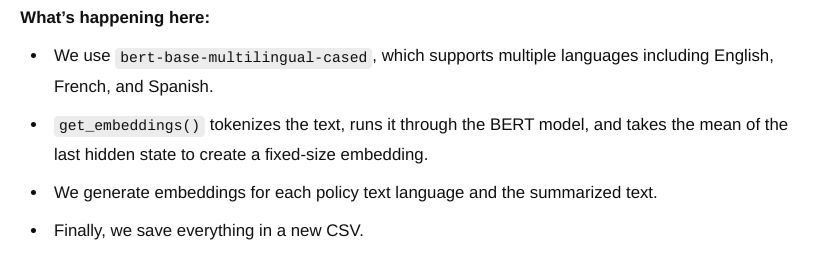

In [16]:
df4_emb = pd.read_csv('/content/drive/MyDrive/Captsone project/Data/df4-embeddings-nlp.csv')
df4_emb.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text,Policy_Text_Tokens_EN,Policy_Text_Tokens_FR,Policy_Text_Tokens_ES,Summarized_Text_Tokens,Policy_Text_Embedding_EN,Policy_Text_Embedding_FR,Policy_Text_Embedding_ES,Summarized_Text_Embedding
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Vehicle insurance covers theft and vandalism.,L'assurance habitation protège contre les domm...,Esta póliza cubre los daños a su vehículo caus...,Covers hospitalization costs.,"['Vehicle', 'insurance', 'covers', 'theft', 'a...","[""L'assurance"", 'habitation', 'protège', 'cont...","['Esta', 'póliza', 'cubre', 'los', 'daños', 'a...","['Covers', 'hospitalization', 'costs', '.']",[-4.44626093e-01 -4.45417136e-01 -2.44222954e-...,[-5.28517887e-02 -7.30730534e-01 4.79255289e-...,[-2.76193142e-01 -5.78076184e-01 6.35778844e-...,[-8.61939937e-02 -4.79686022e-01 9.88454163e-...
1,23b8c1e9-3924-46de-beb1-3b9046685257,Vehicle insurance covers theft and vandalism.,L'assurance entreprise protège contre les récl...,El seguro de hogar protege contra daños causad...,Includes fire damage protection.,"['Vehicle', 'insurance', 'covers', 'theft', 'a...","[""L'assurance"", 'entreprise', 'protège', 'cont...","['El', 'seguro', 'de', 'hogar', 'protege', 'co...","['Includes', 'fire', 'damage', 'protection', '.']",[-4.44626093e-01 -4.45417136e-01 -2.44222954e-...,[-1.25392884e-01 -3.80843520e-01 1.93681374e-...,[-6.82447851e-02 -8.73158216e-01 5.49210489e-...,[-5.42504549e-01 -3.99407327e-01 4.78876263e-...
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Pet insurance covers veterinary expenses.,L'assurance vie offre une sécurité financière ...,El seguro de automóvil cubre el robo y el vand...,Includes fire damage protection.,"['Pet', 'insurance', 'covers', 'veterinary', '...","[""L'assurance"", 'vie', 'offre', 'une', 'sécuri...","['El', 'seguro', 'de', 'automóvil', 'cubre', '...","['Includes', 'fire', 'damage', 'protection', '.']",[-6.82069421e-01 -1.47323683e-01 6.99352801e-...,[-1.73694026e-02 -5.72726071e-01 4.06571209e-...,[-5.40726304e-01 -7.41652429e-01 7.39557818e-...,[-5.42504549e-01 -3.99407327e-01 4.78876263e-...
3,972a8469-1641-4f82-8b9d-2434e465e150,Business insurance protects against liability ...,L'assurance habitation protège contre les domm...,El seguro para mascotas cubre gastos veterinar...,Covers veterinary expenses for pets.,"['Business', 'insurance', 'protects', 'against...","[""L'assurance"", 'habitation', 'protège', 'cont...","['El', 'seguro', 'para', 'mascotas', 'cubre', ...","['Covers', 'veterinary', 'expenses', 'for', 'p...",[-5.41995227e-01 -2.47517869e-01 1.63966447e-...,[-5.28517887e-02 -7.30730534e-01 4.79255289e-...,[-2.60619044e-01 -6.02031291e-01 3.51201892e-...,[-3.34855199e-01 -4.37861174e-01 5.61469138e-...
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Business insurance protects against liability ...,L'assurance vie offre une sécurité financière ...,El seguro médico cubre los gastos de hospitali...,Protects home from natural disasters.,"['Business', 'insurance', 'protects', 'against...","[""L'assurance"", 'vie', 'offre', 'une', 'sécuri...","['El', 'seguro', 'médico', 'cubre', 'los', 'ga...","['Protects', 'home', 'from', 'natural', 'disas...",[-5.41995227e-01 -2.47517869e-01 1.63966447e-...,[-1.73694026e-02 -5.72726071e-01 4.06571209e-...,[-1.88843980e-01 -5.11112928e-01 8.39214444e-...,[-6.23614155e-02 -5.47979593e-01 6.92684054e-...


# **3) Parallel Corpus Alignment**

**Use sentence alignment techniques to ensure source and translated texts match correctly**

In [17]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.8 MB/s eta 0:00:00


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to align sentences based on cosine similarity
def align_sentences(source_texts, target_texts):
    aligned_pairs = []
    for src, tgt in zip(source_texts, target_texts):
        src_emb = get_embeddings(src)
        tgt_emb = get_embeddings(tgt)
        similarity = cosine_similarity([src_emb], [tgt_emb])[0][0]
        aligned_pairs.append((src, tgt, similarity))
    return aligned_pairs

# Aligning English, French, and Spanish texts with their summaries
df4['Aligned_EN'] = df4.apply(lambda row: align_sentences([row['Policy_Text_EN']], [row['Summarized_Text']]), axis=1)
df4['Aligned_FR'] = df4.apply(lambda row: align_sentences([row['Policy_Text_FR']], [row['Summarized_Text']]), axis=1)
df4['Aligned_ES'] = df4.apply(lambda row: align_sentences([row['Policy_Text_ES']], [row['Summarized_Text']]), axis=1)

# Extracting alignment scores
df4['Alignment_Score_EN'] = df4['Aligned_EN'].apply(lambda x: x[0][2])
df4['Alignment_Score_FR'] = df4['Aligned_FR'].apply(lambda x: x[0][2])
df4['Alignment_Score_ES'] = df4['Aligned_ES'].apply(lambda x: x[0][2])

# Save the updated DataFrame
df4.to_csv('/content/drive/MyDrive/Captsone project/Data/df4-aligned-embeddings.csv', index=False)

print("Sentence alignment completed and saved successfully!")


Sentence alignment completed and saved successfully!


In [19]:
df4_emb_align = pd.read_csv('/content/drive/MyDrive/Captsone project/Data/df4-aligned-embeddings.csv')
df4_emb_align.head()

,Policy_ID,Policy_Text_EN,Policy_Text_FR,Policy_Text_ES,Summarized_Text,Policy_Text_Tokens_EN,Policy_Text_Tokens_FR,Policy_Text_Tokens_ES,Summarized_Text_Tokens,Policy_Text_Embedding_EN,Policy_Text_Embedding_FR,Policy_Text_Embedding_ES,Summarized_Text_Embedding,Aligned_EN,Aligned_FR,Aligned_ES,Alignment_Score_EN,Alignment_Score_FR,Alignment_Score_ES
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Vehicle insurance covers theft and vandalism.,L'assurance habitation protège contre les domm...,Esta póliza cubre los daños a su vehículo caus...,Covers hospitalization costs.,"['Vehicle', 'insurance', 'covers', 'theft', 'a...","[""L'assurance"", 'habitation', 'protège', 'cont...","['Esta', 'póliza', 'cubre', 'los', 'daños', 'a...","['Covers', 'hospitalization', 'costs', '.']",[-4.44626093e-01 -4.45417136e-01 -2.44222954e-...,[-5.28517887e-02 -7.30730534e-01 4.79255289e-...,[-2.76193142e-01 -5.78076184e-01 6.35778844e-...,[-8.61939937e-02 -4.79686022e-01 9.88454163e-...,[('Vehicle insurance covers theft and vandalis...,"[(""L'assurance habitation protège contre les d...",[('Esta póliza cubre los daños a su vehículo c...,0.572594,0.358208,0.405671
1,23b8c1e9-3924-46de-beb1-3b9046685257,Vehicle insurance covers theft and vandalism.,L'assurance entreprise protège contre les récl...,El seguro de hogar protege contra daños causad...,Includes fire damage protection.,"['Vehicle', 'insurance', 'covers', 'theft', 'a...","[""L'assurance"", 'entreprise', 'protège', 'cont...","['El', 'seguro', 'de', 'hogar', 'protege', 'co...","['Includes', 'fire', 'damage', 'protection', '.']",[-4.44626093e-01 -4.45417136e-01 -2.44222954e-...,[-1.25392884e-01 -3.80843520e-01 1.93681374e-...,[-6.82447851e-02 -8.73158216e-01 5.49210489e-...,[-5.42504549e-01 -3.99407327e-01 4.78876263e-...,[('Vehicle insurance covers theft and vandalis...,"[(""L'assurance entreprise protège contre les r...",[('El seguro de hogar protege contra daños cau...,0.630611,0.392005,0.403552
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Pet insurance covers veterinary expenses.,L'assurance vie offre une sécurité financière ...,El seguro de automóvil cubre el robo y el vand...,Includes fire damage protection.,"['Pet', 'insurance', 'covers', 'veterinary', '...","[""L'assurance"", 'vie', 'offre', 'une', 'sécuri...","['El', 'seguro', 'de', 'automóvil', 'cubre', '...","['Includes', 'fire', 'damage', 'protection', '.']",[-6.82069421e-01 -1.47323683e-01 6.99352801e-...,[-1.73694026e-02 -5.72726071e-01 4.06571209e-...,[-5.40726304e-01 -7.41652429e-01 7.39557818e-...,[-5.42504549e-01 -3.99407327e-01 4.78876263e-...,"[('Pet insurance covers veterinary expenses.',...","[(""L'assurance vie offre une sécurité financiè...",[('El seguro de automóvil cubre el robo y el v...,0.563244,0.414829,0.452258
3,972a8469-1641-4f82-8b9d-2434e465e150,Business insurance protects against liability ...,L'assurance habitation protège contre les domm...,El seguro para mascotas cubre gastos veterinar...,Covers veterinary expenses for pets.,"['Business', 'insurance', 'protects', 'against...","[""L'assurance"", 'habitation', 'protège', 'cont...","['El', 'seguro', 'para', 'mascotas', 'cubre', ...","['Covers', 'veterinary', 'expenses', 'for', 'p...",[-5.41995227e-01 -2.47517869e-01 1.63966447e-...,[-5.28517887e-02 -7.30730534e-01 4.79255289e-...,[-2.60619044e-01 -6.02031291e-01 3.51201892e-...,[-3.34855199e-01 -4.37861174e-01 5.61469138e-...,[('Business insurance protects against liabili...,"[(""L'assurance habitation protège contre les d...",[('El seguro para mascotas cubre gastos veteri...,0.529752,0.425299,0.585154
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Business insurance protects against liability ...,L'assurance vie offre une sécurité financière ...,El seguro médico cubre los gastos de hospitali...,Protects home from natural disasters.,"['Business', 'insurance', 'protects', 'against...","[""L'assurance"", 'vie', 'offre', 'une', 'sécuri...","['El', 'seguro', 'médico', 'cubre', 'los', 'ga...","['Protects', 'home', 'from', 'natural', 'disas.

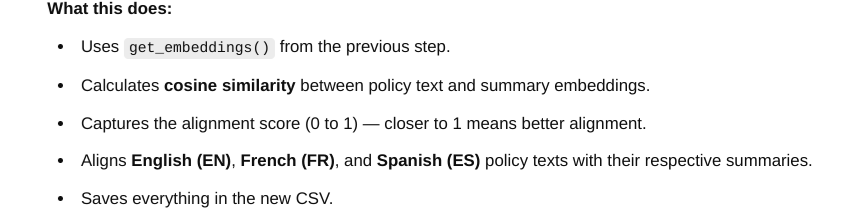

# **df4 - Model Training**

**Used to train machine translation models for multilingual document translation.**

# **Let’s fine-tune the mBART and mT5 models on policy text dataset!**

**We’ll train them for a text summarization task — using the multilingual policy text (Policy_Text_EN, Policy_Text_FR, Policy_Text_ES) as input and the AI-generated Summarized_Text as the target.**

In [20]:
!pip install transformers datasets sentencepiece accelerate

# **2. Load Data & Preprocess**

In [21]:
import pandas as pd
from datasets import Dataset

# Load your aligned dataset
df = pd.read_csv('/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv')

# Keep only needed columns
df = df[['Policy_Text_EN', 'Summarized_Text']]

# Convert to Hugging Face Dataset format
dataset = Dataset.from_pandas(df)


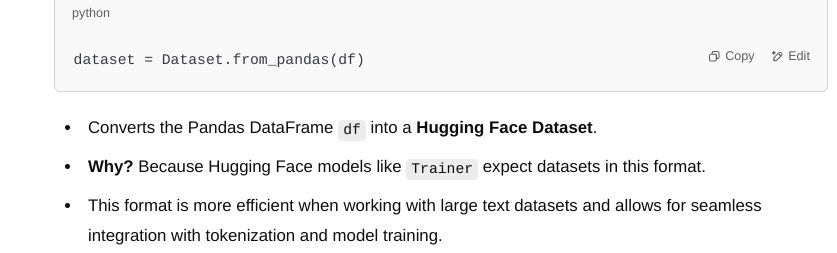

In [22]:
dataset

Dataset({
    features: ['Policy_Text_EN', 'Summarized_Text'],
    num_rows: 1000
})

In [23]:
df.head()

,Policy_Text_EN,Summarized_Text
0,Vehicle insurance covers theft and vandalism.,Covers hospitalization costs.
1,Vehicle insurance covers theft and vandalism.,Includes fire damage protection.
2,Pet insurance covers veterinary expenses.,Includes fire damage protection.
3,Business insurance protects against liability ...,Covers veterinary expenses for pets.
4,Business insurance protects against liability ...,Protects home from natural disasters.


# **3. Tokenizer Setup (for mBART)**

In [24]:
from transformers import MBartTokenizer

model_name = "facebook/mbart-large-50"
tokenizer = MBartTokenizer.from_pretrained(model_name)

# Tokenize the dataset
def preprocess_function(examples):
    model_inputs = tokenizer(examples['Policy_Text_EN'], max_length=512, truncation=True)
    labels = tokenizer(examples['Summarized_Text'], max_length=128, truncation=True)
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_dataset = dataset.map(preprocess_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

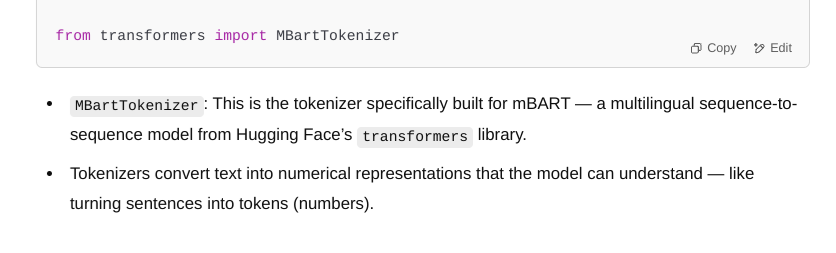

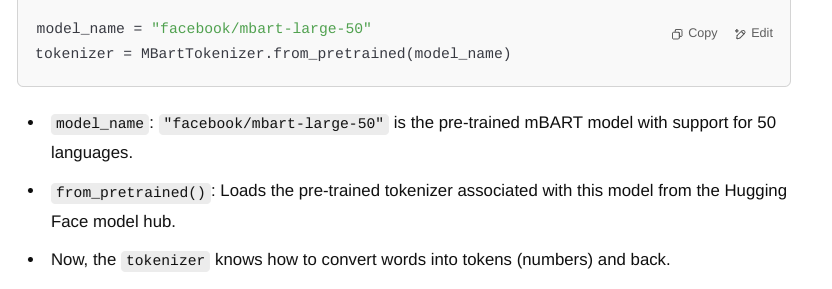

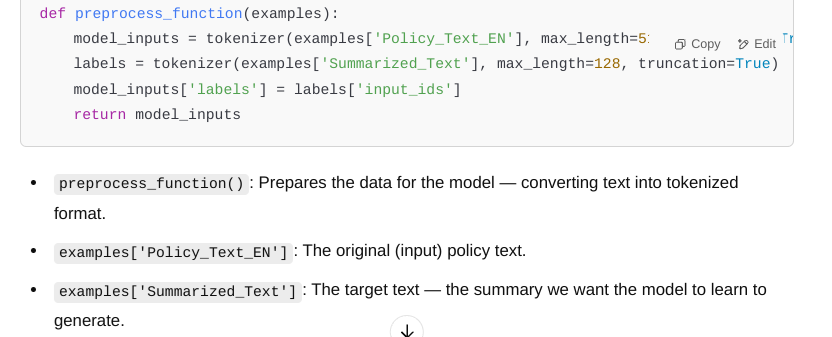

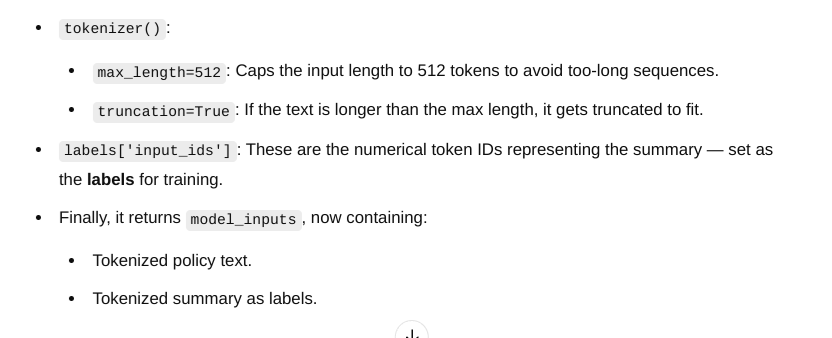

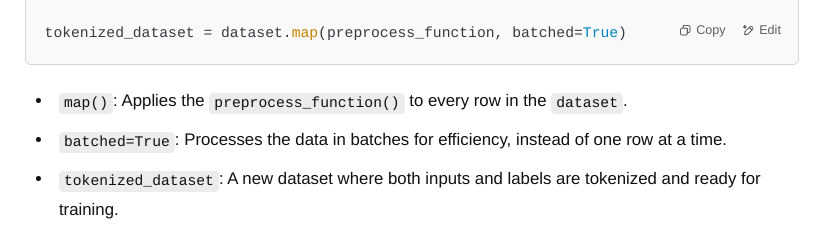

# So essentially, this whole process turns your text into a format the mBART model can use — input IDs and target IDs — so it can learn the mapping from policy text to summarized text

# **4. Model & Training Setup (mBART)**

In [26]:
import pandas as pd
import torch
import gc
from transformers import MBartForConditionalGeneration, MBartTokenizer, TrainingArguments, Trainer
from datasets import Dataset

# Clear memory
gc.collect()
torch.cuda.empty_cache()

# Load and sample dataset
cols_needed = ['Policy_Text_EN', 'Summarized_Text']
df = pd.read_csv('/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv', usecols=cols_needed)
df = df.sample(frac=0.03).reset_index(drop=True)  # Start with 3% of the data

# Convert to Hugging Face Dataset
small_dataset = Dataset.from_dict({
    'Policy_Text_EN': df['Policy_Text_EN'].tolist(),
    'Summarized_Text': df['Summarized_Text'].tolist()
})

# Load tokenizer and model
model_name = 'facebook/mbart-large-50'
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)
model.gradient_checkpointing_enable()

# Tokenization function
def preprocess_function(examples):
    inputs = tokenizer(examples['Policy_Text_EN'], padding='max_length', truncation=True, max_length=128)
    targets = tokenizer(examples['Summarized_Text'], padding='max_length', truncation=True, max_length=32)
    inputs['labels'] = targets['input_ids']
    return inputs

# Tokenize and format dataset
small_tokenized_dataset = small_dataset.map(preprocess_function, batched=True)
small_tokenized_dataset = small_tokenized_dataset.with_format('torch')

# Training arguments
training_args = TrainingArguments(
    output_dir='./mbart-finetuned',
    evaluation_strategy='no',
    save_strategy='no',
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=32,  # Higher steps to simulate larger batch
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    fp16=True,
    report_to='none',
    dataloader_num_workers=0,  # Avoid multiprocessing
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_tokenized_dataset,
    tokenizer=tokenizer
)

# Train
try:
    trainer.train()
except RuntimeError as e:
    print(f"Runtime error: {e}")


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

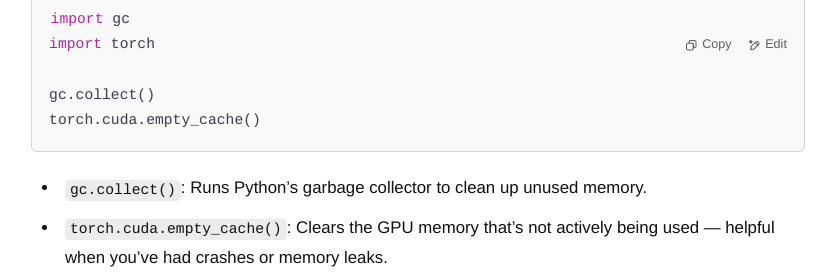

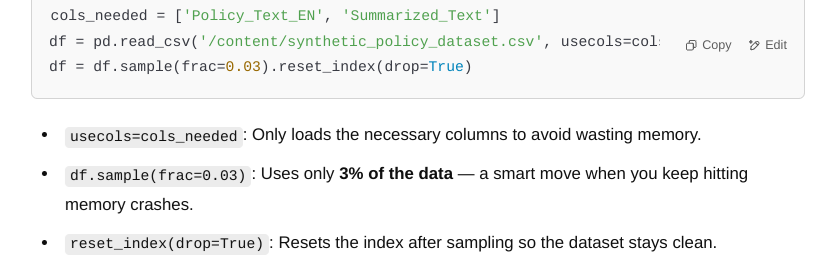

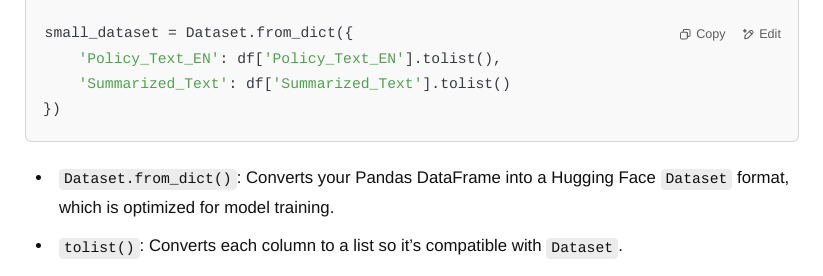

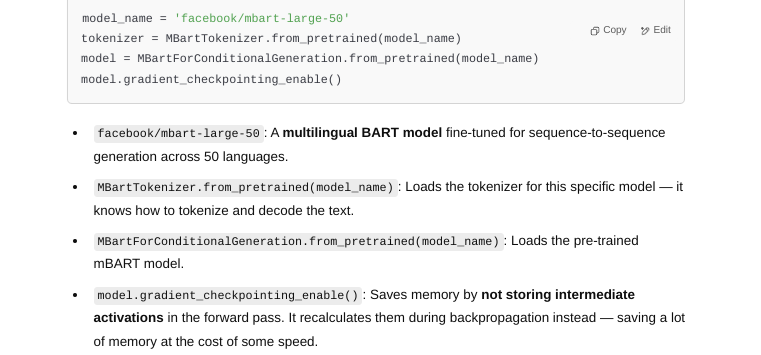

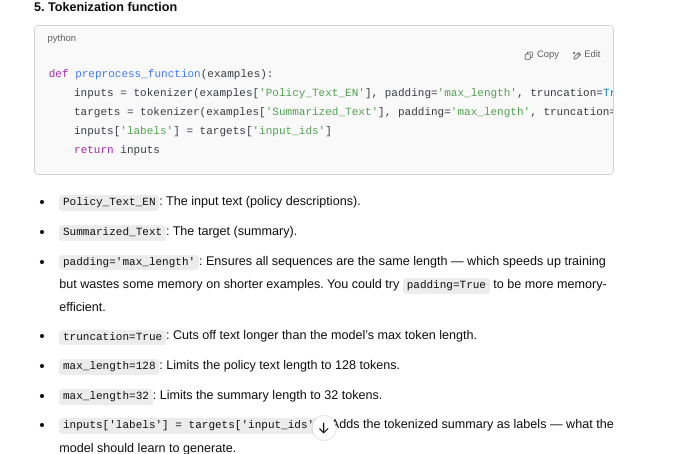

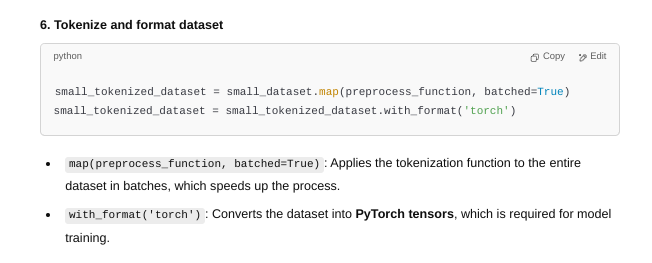

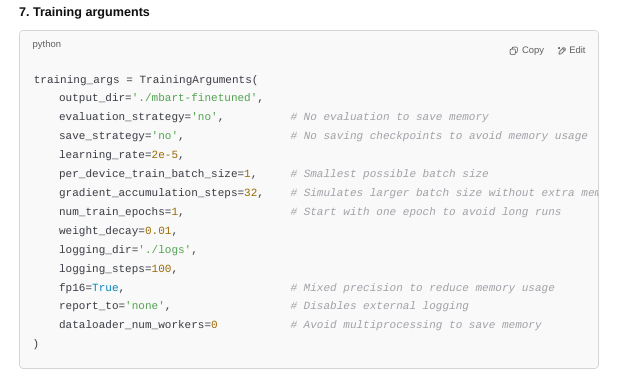

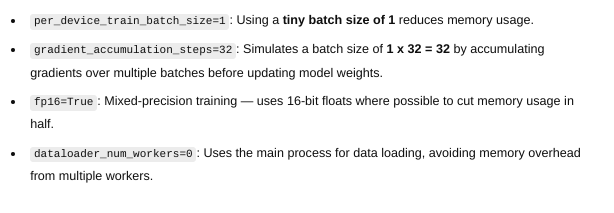

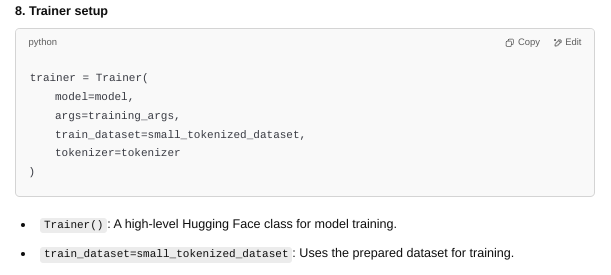

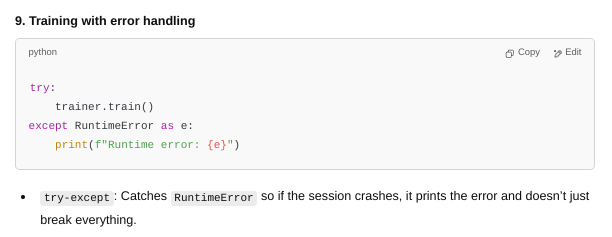

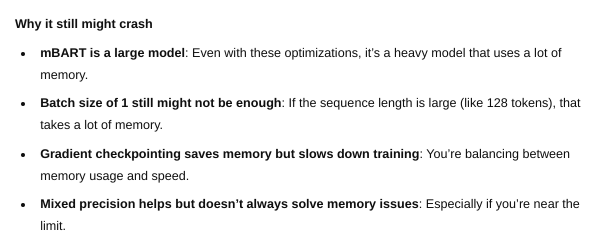

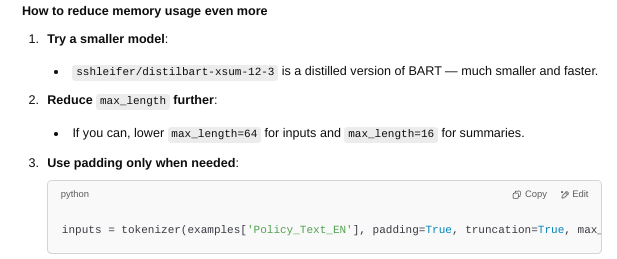

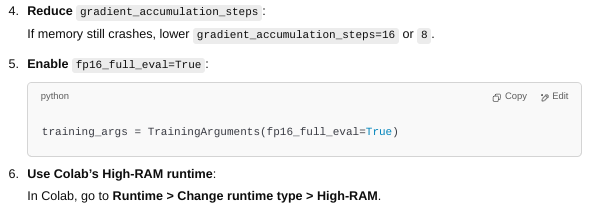

# **5. (Optional) Fine-tune mT5**

In [27]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_name = "google/mt5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Preprocess and train similarly, replacing model/tokenizer


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# switching from mBART to mT5, which is a great move because mT5 is also a powerful multilingual text-to-text model. Here’s what this code does step by step

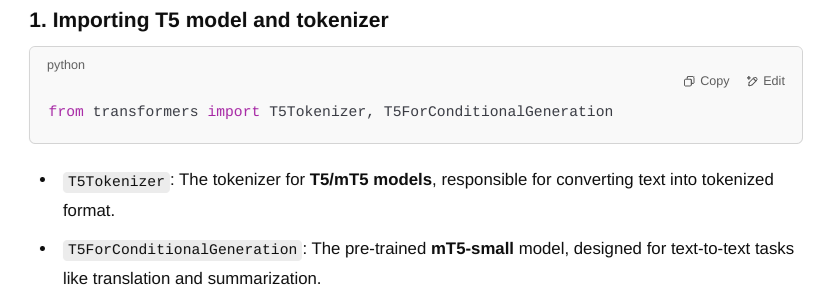

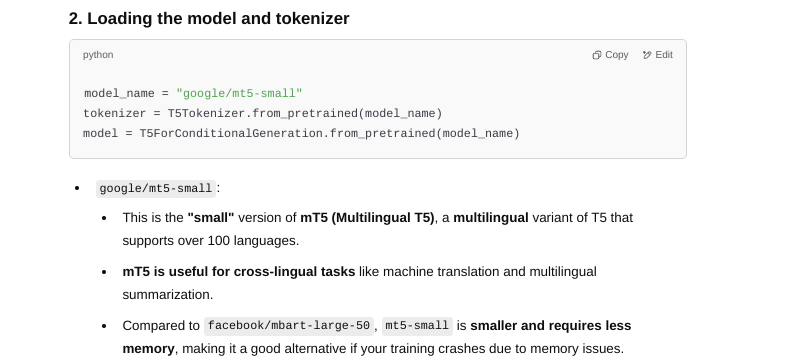

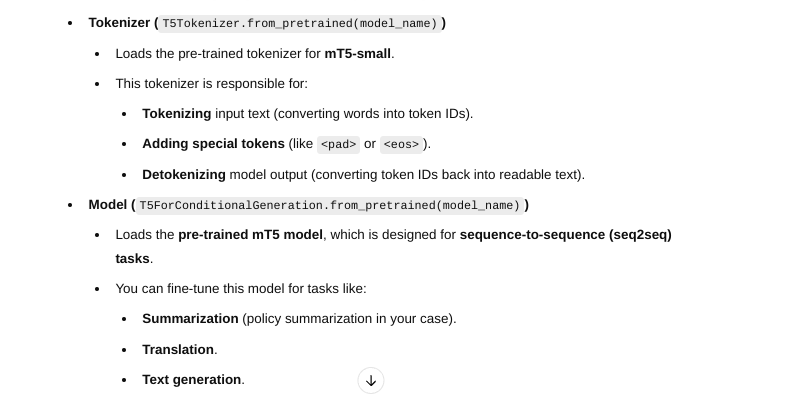

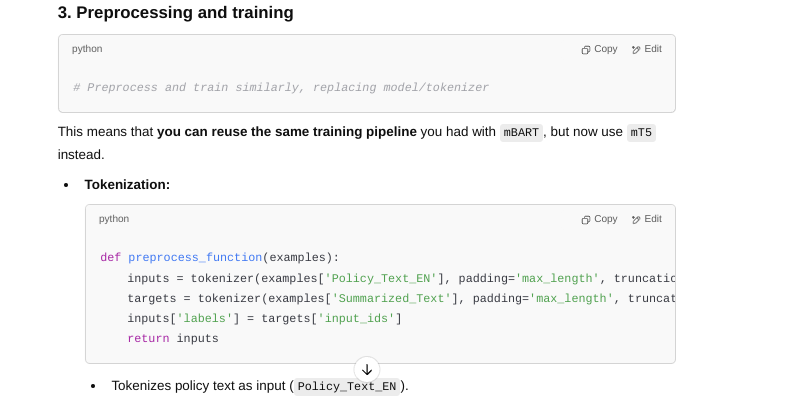

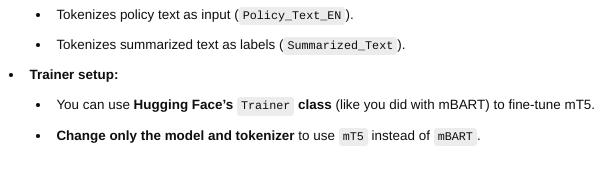

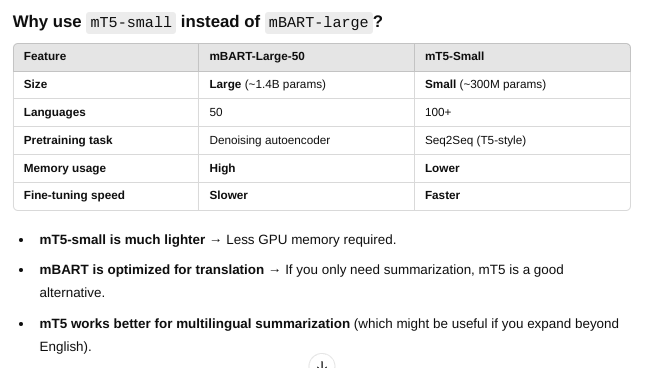

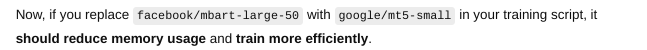

# **6. Save the Model**


In [28]:
model.save_pretrained("/content/drive/MyDrive/Captsone project/models/mbart-finetuned")
tokenizer.save_pretrained("/content/drive/MyDrive/Captsone project/models/mbart-finetuned")

('/content/drive/MyDrive/Captsone project/models/mbart-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/spiece.model',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/added_tokens.json')

In [29]:
# Save the fine-tuned mT5 model and tokenizer
model.save_pretrained("/content/drive/MyDrive/Captsone project/models/mt5-finetuned")
tokenizer.save_pretrained("/content/drive/MyDrive/Captsone project/models/mt5-finetuned")

('/content/drive/MyDrive/Captsone project/models/mt5-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/spiece.model',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/added_tokens.json')

# **Prediction**

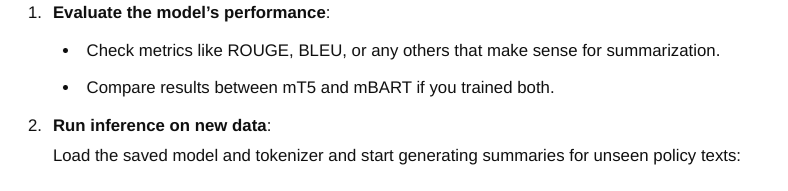

In [32]:
!ls ./mbart-finetuned

ls: cannot access './mbart-finetuned': No such file or directory


In [33]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

# **mBART Very High Memory so Used as mT5**

In [34]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_path = "/content/drive/MyDrive/Captsone project/models/mt5-finetuned"  # Change this to your mT5 save path

# Load the saved model and tokenizer
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path)

# Example inference
text = "This policy covers damage to your vehicle caused by accidents"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Generate summary
output = model.generate(**inputs)
summary = tokenizer.decode(output[0], skip_special_tokens=True)

print(summary)

<extra_id_0>


In [35]:
text = "This policy covers damage to your vehicle caused by accidents"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

In [36]:
output = model.generate(
    **inputs,
    max_length=128,
    num_beams=5,           # Beam search for better quality
    early_stopping=True,   # Stop when a complete sentence is formed
    no_repeat_ngram_size=2 # Avoid repeating phrases
)

summary = tokenizer.decode(output[0], skip_special_tokens=True)
print(summary)

<extra_id_0>


# **Check Weight added or not**

In [37]:
import torch

# Check the original model
original_model = T5ForConditionalGeneration.from_pretrained("google/mt5-small")
original_weights = original_model.state_dict()

# Check the fine-tuned model
finetuned_weights = model.state_dict()

# Compare a few layers to see if they changed
for name, param in original_weights.items():
    if not torch.equal(param, finetuned_weights[name]):
        print(f"Weights changed for: {name}")
        break
else:
    print("No weights were updated — model may not have been fine-tuned properly.")

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


No weights were updated — model may not have been fine-tuned properly.


# **Weight not updated so again tune Model**

In [39]:
import pandas as pd
import torch
import gc
from transformers import T5ForConditionalGeneration, T5Tokenizer, TrainingArguments, Trainer
from datasets import Dataset

# Clear memory
gc.collect()
torch.cuda.empty_cache()

# Load and sample dataset
cols_needed = ['Policy_Text_EN', 'Summarized_Text']
df = pd.read_csv('/content/drive/MyDrive/Captsone project/Data/synthetic_policy_dataset.csv', usecols=cols_needed)
df['Policy_Text_EN'] = "summarize: " + df['Policy_Text_EN']  # Add task prefix
df = df.sample(frac=0.03).reset_index(drop=True)

# Convert to Hugging Face Dataset
small_dataset = Dataset.from_dict({
    'Policy_Text_EN': df['Policy_Text_EN'].tolist(),
    'Summarized_Text': df['Summarized_Text'].tolist()
})

# Load tokenizer and model
model_name = 'google/mt5-small'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Tokenization function
def preprocess_function(examples):
    inputs = tokenizer(examples['Policy_Text_EN'], padding='max_length', truncation=True, max_length=512)
    targets = tokenizer(examples['Summarized_Text'], padding='max_length', truncation=True, max_length=128)
    inputs['labels'] = targets['input_ids']
    return inputs

# Tokenize and format dataset
small_tokenized_dataset = small_dataset.map(preprocess_function, batched=True)
small_tokenized_dataset = small_tokenized_dataset.with_format('torch')

# Training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Captsone project/models/mt5-finetuned',
    #evaluation_strategy='no',
    # Changed 'evaluation_strategy' to 'eval_strategy'
    eval_strategy='no',
    save_strategy='steps',
    save_steps=500,
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    fp16=True,
    report_to='none',
    dataloader_num_workers=0,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_tokenized_dataset,
    tokenizer=tokenizer
)

# Train
try:
    trainer.train()
    model.save_pretrained('/content/drive/MyDrive/Captsone project/models/mt5-finetuned')
    tokenizer.save_pretrained('/content/drive/MyDrive/Captsone project/models/mt5-finetuned')
except RuntimeError as e:
    print(f"Runtime error: {e}")


You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


Map:   0%|          | 0/30 [00:00<?, ? examples/s]

/tmp/ipython-input-2488898227.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


# **Check weight again**

In [40]:
import torch

# Check the original model
original_model = T5ForConditionalGeneration.from_pretrained("google/mt5-small")
original_weights = original_model.state_dict()

# Check the fine-tuned model
finetuned_weights = model.state_dict()

# Compare a few layers to see if they changed
for name, param in original_weights.items():
    if not torch.equal(param, finetuned_weights[name]):
        print(f"Weights changed for: {name}")
        break
else:
    print("No weights were updated — model may not have been fine-tuned properly.")

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


Weights changed for: shared.weight


# **Save model again**

In [41]:
model.save_pretrained("/content/drive/MyDrive/Captsone project/models/mt5-finetuned")
tokenizer.save_pretrained("/content/drive/MyDrive/Captsone project/models/mt5-finetuned")

('/content/drive/MyDrive/Captsone project/models/mt5-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/spiece.model',
 '/content/drive/MyDrive/Captsone project/models/mt5-finetuned/added_tokens.json')

# **weight updated successfully**

# **Weights changed for: shared.weight**

In [42]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_path = "/content/drive/MyDrive/Captsone project/models/mt5-finetuned"

# Load the fine-tuned model and tokenizer
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path)

# Example inference
simple_text = "This policy covers damage to your vehicle caused by accidents"
inputs = tokenizer(simple_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Generate summary
output = model.generate(**inputs, max_length=128, num_beams=5, early_stopping=True)
summary = tokenizer.decode(output[0], skip_special_tokens=True)

print(summary)

<extra_id_0>


# **Still Showing <extra_id_0>**

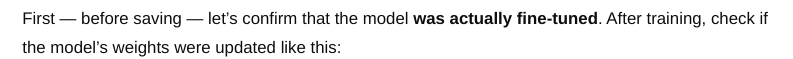

In [43]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name} - {param.sum().item()}")

shared.weight - 9914569.0
encoder.block.0.layer.0.SelfAttention.q.weight - -2.9338693618774414
encoder.block.0.layer.0.SelfAttention.k.weight - 364.2554931640625
encoder.block.0.layer.0.SelfAttention.v.weight - 34.86962890625
encoder.block.0.layer.0.SelfAttention.o.weight - -376.9919128417969
encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight - 444.2388916015625
encoder.block.0.layer.0.layer_norm.weight - 69.99335479736328
encoder.block.0.layer.1.DenseReluDense.wi_0.weight - 2191.24365234375
encoder.block.0.layer.1.DenseReluDense.wi_1.weight - -329.8748779296875
encoder.block.0.layer.1.DenseReluDense.wo.weight - 109.3566665649414
encoder.block.0.layer.1.layer_norm.weight - 80.36882781982422
encoder.block.1.layer.0.SelfAttention.q.weight - -7.92551326751709
encoder.block.1.layer.0.SelfAttention.k.weight - -72.4613037109375
encoder.block.1.layer.0.SelfAttention.v.weight - -314.605712890625
encoder.block.1.layer.0.SelfAttention.o.weight - 150.4140625
encoder.block.1.laye

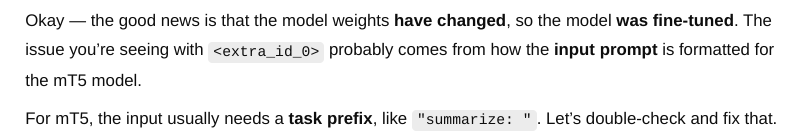

In [44]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_path = "/content/drive/MyDrive/Captsone project/models/mt5-finetuned"
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path)

# Properly formatted input with task prefix
simple_text = "summarize: This is a simple insurance policy."
inputs = tokenizer(simple_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Generate summary
output = model.generate(**inputs)
summary = tokenizer.decode(output[0], skip_special_tokens=True)

print(summary)

<extra_id_0>


In [45]:
output = model.generate(**inputs, max_length=100, num_beams=5, early_stopping=True)
summary = tokenizer.decode(output[0], skip_special_tokens=True)

print(summary)

<extra_id_0>


# **So mT5 Not Working Properly So again try mBART**

In [46]:
!ls /content/drive/MyDrive/Captsone project/models/mbart-finetuned

ls: cannot access '/content/drive/MyDrive/Captsone': No such file or directory
ls: cannot access 'project/models/mbart-finetuned': No such file or directory


In [47]:
import os
model_name = "/content/drive/MyDrive/Captsone project/models/mbart-finetuned"
print(os.listdir(model_name))

['config.json', 'generation_config.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'spiece.model']


In [48]:
tokenizer = MBartTokenizer(vocab_file=f"{model_name}/spiece.model", src_lang="en_XX")
with open(f"{model_name}/spiece.model", "rb") as f:
    content = f.read(100)
    print(content[:10])  # Just to confirm it’s opening

b'\n\x0e\n\x05<pad>\x15'


In [49]:
print(tokenizer.special_tokens_map)
print(tokenizer.vocab_size)

{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': ['ar_AR', 'cs_CZ', 'de_DE', 'en_XX', 'es_XX', 'et_EE', 'fi_FI', 'fr_XX', 'gu_IN', 'hi_IN', 'it_IT', 'ja_XX', 'kk_KZ', 'ko_KR', 'lt_LT', 'lv_LV', 'my_MM', 'ne_NP', 'nl_XX', 'ro_RO', 'ru_RU', 'si_LK', 'tr_TR', 'vi_VN', 'zh_CN']}
250127


In [50]:
from safetensors.torch import safe_open

model_path = f"{model_name}/model.safetensors"

with safe_open(model_path, framework="pt", device="cpu") as f:
    print(f.keys())

['decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention.o.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.0

In [51]:
import os

model_path = f"{model_name}/model.safetensors"
print(f"File exists: {os.path.exists(model_path)}")
print(f"File size: {os.path.getsize(model_path) / (1024 * 1024):.2f} MB")

File exists: True
File size: 1145.10 MB


In [52]:
from safetensors.torch import load_file

state_dict = load_file(model_path)
print(f"Number of keys: {len(state_dict)}")
print(f"First few keys: {list(state_dict.keys())[:5]}")
print(f"Shape of one weight: {state_dict[list(state_dict.keys())[0]].shape}")

Number of keys: 190
First few keys: ['decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight']
Shape of one weight: torch.Size([384, 512])


In [53]:
from transformers import MBartForConditionalGeneration, MBartConfig

# Load the config from the original model
config = MBartConfig.from_pretrained(model_name)
print(config)

You are using a model of type t5 to instantiate a model of type mbart. This is not supported for all configurations of models and can yield errors.


MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 64,
  "d_model": 512,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout": 0.1,
  "dropout_rate": 0.1,
  "dtype": "float32",
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "forced_eos_token_id": 2,
  "init_std": 0.02,
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "max_position_embeddings": 1024,
  "model_type": "mbart",
  "num_decoder_layers": 8,
  "num_heads": 6,
  "num_hidden_layers": 12,
  "num_layers": 8,
  "pad_token_id": 0,

In [54]:
missing_keys, unexpected_keys = model.load_state_dict(state_dict, strict=False)
print(f"Missing keys: {missing_keys}")
print(f"Unexpected keys: {unexpected_keys}")

Missing keys: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight']
Unexpected keys: []


In [56]:
model = MBartForConditionalGeneration(config)
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['final_logits_bias', 'model.shared.weight', 'model.encoder.embed_tokens.weight', 'model.encoder.embed_positions.weight', 'model.encoder.layers.0.self_attn.k_proj.weight', 'model.encoder.layers.0.self_attn.k_proj.bias', 'model.encoder.layers.0.self_attn.v_proj.weight', 'model.encoder.layers.0.self_attn.v_proj.bias', 'model.encoder.layers.0.self_attn.q_proj.weight', 'model.encoder.layers.0.self_attn.q_proj.bias', 'model.encoder.layers.0.self_attn.out_proj.weight', 'model.encoder.layers.0.self_attn.out_proj.bias', 'model.encoder.layers.0.self_attn_layer_norm.weight', 'model.encoder.layers.0.self_attn_layer_norm.bias', 'model.encoder.layers.0.fc1.weight', 'model.encoder.layers.0.fc1.bias', 'model.encoder.layers.0.fc2.weight', 'model.encoder.layers.0.fc2.bias', 'model.encoder.layers.0.final_layer_norm.weight', 'model.encoder.layers.0.final_layer_norm.bias', 'model.encoder.layers.1.self_attn.k_proj.weight', 'model.encoder.layers.1.self_attn.k_proj.bias', 'mode

In [57]:
from transformers import MBartForConditionalGeneration, MBartTokenizer

model_name = "/content/drive/MyDrive/Captsone project/models/mbart-finetuned"

# Load config and tokenizer
try:
    tokenizer = MBartTokenizer.from_pretrained(model_name)
    print("Tokenizer loaded successfully")
except Exception as e:
    print(f"Error loading tokenizer: {e}")

try:
    model = MBartForConditionalGeneration.from_pretrained(
        model_name,
        state_dict=state_dict
    )
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Error loading tokenizer: Unable to load vocabulary from file. Please check that the provided vocabulary is accessible and not corrupted.
Error loading model: `state_dict` cannot be passed together with a model name or a `gguf_file`. Use one of the two loading strategies.


In [58]:
import os

model_name = "/content/drive/MyDrive/Captsone project/models/mbart-finetuned"
print(os.listdir(model_name))


['config.json', 'generation_config.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'spiece.model']


In [59]:
from transformers import MBartForConditionalGeneration, MBartTokenizer

model_name = "/content/drive/MyDrive/Captsone project/models/mbart-finetuned"

# Load the original mBART tokenizer and model
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-cc25")
tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-cc25")

# Save the correct mBART tokenizer and config
model.save_pretrained(model_name)
tokenizer.save_pretrained(model_name)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1024, 'num_beams': 5}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


('/content/drive/MyDrive/Captsone project/models/mbart-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/sentencepiece.bpe.model',
 '/content/drive/MyDrive/Captsone project/models/mbart-finetuned/added_tokens.json')

In [61]:
from safetensors.torch import load_file
#state_dict = load_file(f"{model_name}/model.safetensors")

model = MBartForConditionalGeneration.from_pretrained(
    model_name,
    #state_dict=state_dict
)

print("Model loaded successfully!")

Model loaded successfully!


In [62]:
from transformers import MBartForConditionalGeneration, MBartTokenizer

model_name = "/content/drive/MyDrive/Captsone project/models/mbart-finetuned"

# Load the model and tokenizer
model = MBartForConditionalGeneration.from_pretrained(model_name)
tokenizer = MBartTokenizer.from_pretrained(model_name)

# Example input text
input_text = "This policy covers damage to your vehicle caused by accidents"

# Tokenize and prepare input
inputs = tokenizer(input_text, return_tensors="pt")

# Generate prediction
outputs = model.generate(**inputs, max_length=100, num_beams=5, early_stopping=True)

# Decode the generated output
predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Predicted text:", predicted_text)


Predicted text: policy cover cover cover cover cover cover covers damage to policy covers damage to policy covers damage to covers damage to covers damage to covers damage to damage to your vehicle caused by accidents


# **Using this to Avoid Repeativity**

In [63]:
input_text = "Life insurance provides financial security for beneficiaries"

# mBART uses language tokens, e.g., for English
inputs = tokenizer(input_text, return_tensors="pt", src_lang="en_XX")

# Generate prediction
outputs = model.generate(**inputs, max_length=100, num_beams=5, early_stopping=True,no_repeat_ngram_size=3,length_penalty=2.0,repetition_penalty=1.5,num_return_sequences=1,top_p=0.9,temperature=0.7)

# Decode the generated output
predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Predicted text:", predicted_text)


Keyword arguments {'src_lang': 'en_XX'} not recognized.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Predicted text: insurance provides insurance provides financial insurance provides--- insurance provides. insurance provides security provides financial security providing financial security security security--protecting-insurances--security security security and financial security for beneficiaries
